# BootComp Experimental Developments

This notebook is used for development of BootComp procedures

In [1]:
import Bootstrap as bs
import BootIO as io
import BootChartExtensions as ch
import MCC as mcc
import ConvFuncs as cf

In [2]:
#DEV
import Bootstrap_crn as crn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Parameters and setup

In [4]:
N_BOOTS = 2000
INPUT_DATA = "data/real_scenarios.csv"

In [5]:
scenario_data = crn.load_scenarios(INPUT_DATA)
N_SCENARIOS = scenario_data.shape[1]
print("Loaded data. {0} scenarios".format(N_SCENARIOS))

Loaded data. 59 scenarios


In [6]:
scenario_data.shape

(20, 59)

In [7]:
args =  bs.BootstrapArguments()

args.nboots = N_BOOTS
args.nscenarios = N_SCENARIOS

args.point_estimate_func = bs.bootstrap_mean
args.difference_func = bs.boot_mean_diff
args.summary_func = bs.proportion_x2_lessthan_x1

## 1.a Check if CRN has worked

If common random numbers are working correctly then the variance of the differences between scenarios will be less than the sum of the variances.  

In [8]:
help(crn.variance_reduction_results)

Help on function variance_reduction_results in module Bootstrap_crn:

variance_reduction_results(data)
    Check if common random numbers have
    been successful in reducing the variance
    
    if successful the variance of the differences between
    two scenarios will be less than the sum.
    
    returns: numpy array of length len(data) - 1.  Each value 
    is either 0 (variance not reduced) or 1 (variance reduced)
    
    @data - the scenario data.



In [9]:
crn.variance_reduction_results(scenario_data)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## 2. Analysis Procedures

### 2.1 Resampling

In [10]:
boot_data = crn.resample_all_scenarios(scenario_data, N_BOOTS)

In [11]:
boot_data.shape

(2000, 59)

In [12]:
df_boots = pd.DataFrame(boot_data, columns = [i+1 for i in range(N_SCENARIOS)])


In [13]:
df_boots.index = df_boots.index+1

In [14]:
df_boots

,1,2,3,4,5,6,7,8,9,10,...,50,51,52,53,54,55,56,57,58,59
1,1.542250,4.193210,3.223595,2.134020,1.765844,1.743896,1.606722,1.540878,1.542250,1.542250,...,0.656927,0.277778,0.171468,0.170096,0.168038,7.205761,0.656379,0.183128,0.171468,0.169410
2,0.659671,2.344993,1.587311,1.133813,0.808505,0.709054,0.714540,0.659671,0.659671,0.659671,...,0.192044,0.097394,0.060357,0.056241,0.054183,7.078464,0.193416,0.096708,0.054184,0.054184
3,1.341290,3.413238,2.500412,1.891153,1.595062,1.529904,1.394788,1.341976,1.341290,1.341290,...,0.625515,0.240741,0.170782,0.169410,0.165981,12.336899,0.575446,0.174211,0.168724,0.165981
4,0.716461,3.003977,1.844650,1.435940,0.898217,0.815227,0.798766,0.717147,0.716461,0.716461,...,0.289300,0.196845,0.058299,0.056927,0.056240,2.461180,0.374486,0.081619,0.058985,0.058985
5,1.072703,3.638958,2.553430,1.769410,1.268176,1.230453,1.216050,1.074074,1.072703,1.072703,...,0.471879,0.386831,0.102195,0.102195,0.102194,2.896365,0.445816,0.155007,0.104938,0.104938
6,0.896845,2.776886,1.990467,1.367558,1.014129,0.964746,0.940741,0.895473,0.896845,0.896845,...,0.323594,0.115226,0.079561,0.078189,0.076130,5.756105,0.366941,0.105624,0.078189,0.077503
7,1.208917,3.668656,2.895817,1.773800,1.359808,1.348148,1.286420,1.207545,1.208917,1.208917,...,0.475995,0.258573,0.117284,0.115912,0.115226,3.880453,0.425926,0.168038,0.117284,0.116598
8,0.936351,3.329355,2.295679,1.589781,1.118107,1.054321,1.048834,0.937037,0.936351,0.936351,...,0.379287,0.294925,0.092593,0.089849,0.089163,4.391564,0.385460,0.139232,0.090535,0.090535
9,0.447600,2.242729,1.248285,0.906036,0.510700,0.477778,0.492181,0.447600,0.447600,0.447600,...,0.126749,0.045953,0.024005,0.022634,0.021947,4.250686,0.138546,0.056241,0.021948,0.021948
10,1.053635,3.614129,2.370919,1.647120,1.287517,1.200412,1.190810,1.055007,1.053635,1.053635,...,0.420439,0.331276,0.102195,0.099451,0.098079,3.155556,0.391632,0.151578,0.098080,0.098080


### 2.2. Comparison Scenarios

In [15]:
# cast from numpy array to list of lists for backward compatability
boot_data2 = boot_data.T.tolist()


In [16]:
results = bs.compare_scenarios_pairwise(boot_data2, args) 

### 2.3. Printing Results

In [17]:
matrix = io.results_to_matrix(results)
io.insert_inverse_results(matrix, args.nscenarios)
df = cf.matrix_to_dataframe(matrix, io.scenario_headers(args.nscenarios))
df.style.applymap(io.colour_cells_by_proportion)

## 2.4 Ranking Systems

### 2.4.1 Rank by wins

In [18]:
ranks = bs.rank_systems_min(df_boots, args)
s_ranks = ranks.sort_values("f_x", ascending=False)
s_ranks

,f_x,p_x
system,,
29,1292,0.6460
38,1292,0.6460
48,1292,0.6460
47,1292,0.6460
46,1292,0.6460
39,1292,0.6460
40,1292,0.6460
54,692,0.3460
36,498,0.2490


### 2.4.2 Top m

In [19]:
msmallest = bs.rank_systems_msmallest(df_boots, args, 5)
msmallest

,f_x,p_x
system,,
29,1946,0.9730
38,1946,0.9730
48,1946,0.9730
47,1946,0.9730
46,1946,0.9730
39,1946,0.9730
40,1946,0.9730
37,723,0.3615
36,723,0.3615


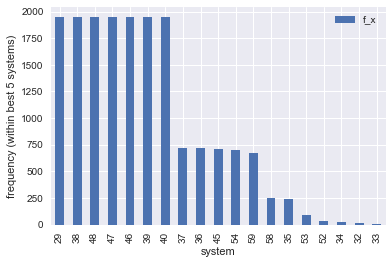

In [20]:
s_ranks = msmallest.sort_values("f_x", ascending=False)
ax= s_ranks.plot(x=s_ranks.index, y='f_x', kind='bar')
ax.set_ylabel('frequency (within best 5 systems)')

plt.show()

### Rerunning the comparisons with smaller subset

In [21]:
subset_indexes = msmallest.index.values.tolist()
#zero indexed
subset_indexes_zero = [x - 1 for x in subset_indexes]

subset = cf.subset_of_list(boot_data, subset_indexes_zero)


In [22]:
args.nscenarios = len(subset)
args.summary_func = bs.proportion_x2_lessthan_x1
#args.summary_func = bs.proportion_x2_greaterthan_x1
results = bs.compare_scenarios_pairwise(subset, args) 
matrix = io.results_to_matrix(results) 
io.insert_inverse_results(matrix, args.nscenarios)

In [23]:
df_subset = cf.matrix_to_dataframe(matrix, [str(i) for i in subset_indexes])
df_subset.style.applymap(io.colour_cells_by_proportion)

In [24]:
df_subset = df_subset.reindex_axis(sorted(df_subset.columns), axis=1)
df_subset.reindex_axis(sorted(df_subset.columns), axis=0).style.applymap(io.colour_cells_by_proportion)

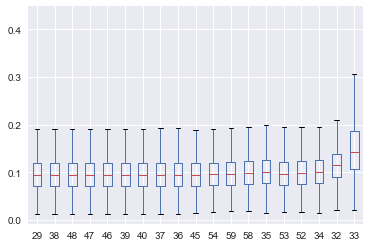

In [25]:
subset_indexes = msmallest.index.values.tolist()
ax = df_boots[subset_indexes].plot.box()